In [1]:
import pandas as pd
from models.transformer_classifier import HateSpeechDetector
import importlib
import utils.evaluation as evaluator


2025-01-21 15:42:59.579658: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Prepare Binary Test dataset

In [2]:
bi_test = pd.read_csv("data/binary/binary_test.csv", index_col=False)
bi_test[bi_test['text'].isna()]

,Unnamed: 0,text,labels
375,375,NaN,0
428,428,NaN,0
1591,1591,NaN,0


In [3]:
bi_test = bi_test.dropna()

In [4]:
bi_test_texts = bi_test['text'].values.tolist()
bi_test_labels = bi_test['labels'].values.tolist()

In [5]:
bi_labels = {0:'clean', 1:'offensive'}

## Phobert Binary

In [6]:
phobert_bi_clf = HateSpeechDetector.load_model(model_dir="models/phobert-binary/", num_labels=2)

['Như Quỳnh zoo zooo', 'Củ kỉ xấu_xí mầm chi', 'j giọng khàn_khàn éo thể iu dc', 'Tổ sử mấy thằng bênh_vực nhau .Thế gạt tay ??Lỡ thằng báo đấm vỡ mõm thằng CA xong bảo gạt xử thằng báo ko ??Toàn trò_hề bọn CA chó này !!', 'add viết tắt address nữa , ngu !', 'Chúc Tộc_Trưởng nghỉ lễ vui_vẻ .Chúc Tộc ca Tộc_Tỉ nghỉ lễ vui_vẻ', 'Đúng mày thức dân việt_nam ta bao ?', "Kg_Phan dong may ' chui vao lam gi ?", 'Đẹp_trai tài_năng tư đỉnh đỉnh thầy dell nha thầy tỉnh thầy hát hây nha', 'Bã thương', 'Sang đài_loan kiện công_ty đi tù việt_nam dmcs nun', 'Tr_Thanh_Tùngg gái', 'Bài mai', 'Anh mày nợ giang_hồ hóc_môn , mày nợ dám Việt_Nam , bày đặc banh', 'Fake_Real đi , mua tuỳ kiện', 'Con bóng đực kia dạng đầu_trâu_mặt_ngựa , 2 mặt , nịnh_bợ .', 'Nhung', 'Có CNXH xếp hình_thái_Kinh_tế giới không ?VÌ NƯỚC NÀO ÁP_DỤNG NÓ SẼ BỊ DIỆT_VONG CMNR CÒN TỒN_TẠI ĐÂU MÀ ÁP_DỤNG HÌNH_THÁI_KINH_TẾ KHÁC .', 'Do di nug lon', 'Trung đập thẻ , Trung phá_sản', 'Cực_kỳ thuyết_phục', 'Cái a hi_sinh xe_máy đáng .Giờ qu

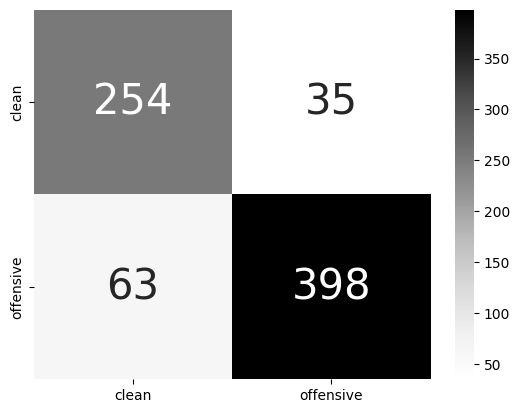

In [7]:
evaluator.evaluate(phobert_bi_clf, bi_test_texts[0:750], bi_test_labels[0:750], text_labels=bi_labels.values())

In [12]:
model_path ='models/phobert-binary/onnx/phobert-binary-quantized.onnx'
tokenizer = 'vinai/phobert-base'

In [13]:
phobert_bi_onnx_clf = HateSpeechDetector.load_model(model_dir=model_path, tokenizer=tokenizer)

['Như Quỳnh zoo zooo', 'Củ kỉ xấu_xí mầm chi', 'j giọng khàn_khàn éo thể iu dc', 'Tổ sử mấy thằng bênh_vực nhau .Thế gạt tay ??Lỡ thằng báo đấm vỡ mõm thằng CA xong bảo gạt xử thằng báo ko ??Toàn trò_hề bọn CA chó này !!', 'add viết tắt address nữa , ngu !', 'Chúc Tộc_Trưởng nghỉ lễ vui_vẻ .Chúc Tộc ca Tộc_Tỉ nghỉ lễ vui_vẻ', 'Đúng mày thức dân việt_nam ta bao ?', "Kg_Phan dong may ' chui vao lam gi ?", 'Đẹp_trai tài_năng tư đỉnh đỉnh thầy dell nha thầy tỉnh thầy hát hây nha', 'Bã thương', 'Sang đài_loan kiện công_ty đi tù việt_nam dmcs nun', 'Tr_Thanh_Tùngg gái', 'Bài mai', 'Anh mày nợ giang_hồ hóc_môn , mày nợ dám Việt_Nam , bày đặc banh', 'Fake_Real đi , mua tuỳ kiện', 'Con bóng đực kia dạng đầu_trâu_mặt_ngựa , 2 mặt , nịnh_bợ .', 'Nhung', 'Có CNXH xếp hình_thái_Kinh_tế giới không ?VÌ NƯỚC NÀO ÁP_DỤNG NÓ SẼ BỊ DIỆT_VONG CMNR CÒN TỒN_TẠI ĐÂU MÀ ÁP_DỤNG HÌNH_THÁI_KINH_TẾ KHÁC .', 'Do di nug lon', 'Trung đập thẻ , Trung phá_sản', 'Cực_kỳ thuyết_phục', 'Cái a hi_sinh xe_máy đáng .Giờ qu

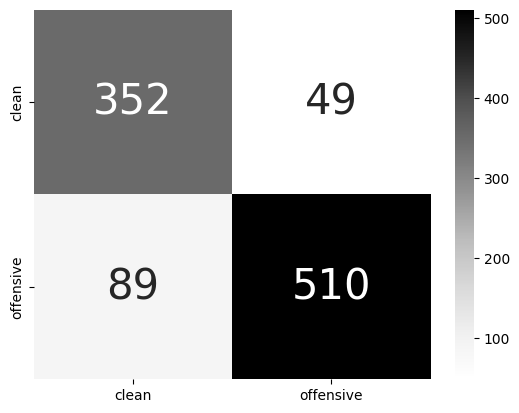

In [14]:

evaluator.evaluate(phobert_bi_onnx_clf, bi_test_texts[0:1000], bi_test_labels[0:1000], text_labels=bi_labels.values())